# Árbol aumentos

---

[Conexión con base de datos](##Conexión-con-base-de-datos)

[Limpieza de datos](#Limpieza-de-datos)

[Metadata](#Metadata)

[Árbol de decisión](#Árbol-de-decisión)

## Conexión con base de datos
---
Realiza la conexión con base de datos local que contiene datos históricos

In [1]:
from matplotlib.font_manager import json_load
import pandas as pd
import json
import os
import psycopg2 as ps
from datetime import date, datetime, timedelta
# %%
pd.set_option('display.max_columns', None)

In [2]:
os.getcwd()

'C:\\Users\\lacia\\OneDrive\\Documents\\10. TFI\\0. Labs'

In [3]:
#ps.connect(host=hostname,dbname=database,user=username,password=pwd,port=portid)
def connect_to_db(host_name,db_name,port,username,password):
    try:
        conn = ps.connect(
            host = hostname,
            dbname = database,
            user = username,
            password = pwd,
            port = portid
        )
    except ps.OperationalError as e:
        raise e
    else:
        print("Connected!")
    return conn


In [4]:
# %%
#Parametros para conectarnos a la base de datos
hostname = "localhost"
database = 'precios_clarosdb'
username = 'postgres'
pwd = 'postgres'
portid = 5432
#conn = None
#cur = None



In [5]:
conn = connect_to_db(hostname,database,portid,username,pwd)

Connected!


In [6]:
def query(curr):
    consulta = ("""SELECT * FROM db_python;""")
    curr.execute(consulta)

In [7]:
curr = conn.cursor()

In [8]:
query(curr)

In [9]:
query_results = curr.fetchall()

In [10]:
columnas = ['key', 'bandera_id', 'lat', 'lng',
            'sucursalnombre', 'id_', 'sucursaltipo',
            'provincia', 'promo1_descripcion','promo1_precio',
            'preciolista','promo2_descripcion','promo2_precio',
            'actualizadohoy','direccion','banderadescripcion',
            'localidad','comerciorazonsocial','comercioid','marca','nombre',
           'presentacion','fecha']

In [11]:
df = pd.DataFrame(query_results, columns=columnas)

In [12]:
df.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha
0,sucursales,1,-34.6036515,-58.405234,384 - BALVANERA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Pueyrredon 576 (Balvanera),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
1,sucursales,1,-34.6764626,-58.4933966,386 - VILLA LUGANO,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Montiel 3829 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
2,sucursales,1,-34.6530744,-58.4814134,387 - PARQUE AVELLANEDA,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Olivera 1268 (Villa Lugano),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
3,sucursales,1,-34.6262843,-58.4569877,389 - FLORES,7790070012050,Autoservicio,AR-C,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Av Boyaca 37 (Flores),Supermercados DIA,CAPITAL FEDERAL,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24
4,sucursales,1,-35.0530892,-58.7606411,39 - CAÑUELAS,7790070012050,Autoservicio,AR-B,0% de descuento. Precio Promocional Exclusivo ...,186.37,186.37,,NaN,true,Cl Rivadavia 800,Supermercados DIA,BUENOS AIRES,DIA Argentina S.A,15,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-24


## Limpieza de datos
---
Revisa tipo de datos obtenido y los convertimos de corresponder

In [13]:
df.describe()

,promo1_precio,preciolista,promo2_precio
count,48766.000000,883967.000000,169302.000000
mean,301.956851,300.008436,249.343296
std,97.320125,135.662823,123.814429
min,94.560000,0.000000,67.900000
25%,192.800000,167.660000,135.310000
50%,306.750000,320.100000,228.990000
75%,360.000000,383.000000,346.040000
max,602.650000,709.000000,556.400000


In [14]:
df.dtypes

key                     object
bandera_id              object
lat                     object
lng                     object
sucursalnombre          object
id_                     object
sucursaltipo            object
provincia               object
promo1_descripcion      object
promo1_precio          float64
preciolista            float64
promo2_descripcion      object
promo2_precio          float64
actualizadohoy          object
direccion               object
banderadescripcion      object
localidad               object
comerciorazonsocial     object
comercioid              object
marca                   object
nombre                  object
presentacion            object
fecha                   object
dtype: object

In [15]:
df['promo1_precio'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1153795     True
1153796     True
1153797     True
1153798     True
1153799     True
Name: promo1_precio, Length: 1153800, dtype: bool

In [16]:
df['lat'] = df['lat'].astype('float64')
df['lng'] = df['lng'].astype('float64')


In [17]:
df.describe()

,lat,lng,promo1_precio,preciolista,promo2_precio
count,875937.000000,875937.000000,48766.000000,883967.000000,169302.000000
mean,-35.328574,-60.459678,301.956851,300.008436,249.343296
std,3.861188,3.579406,97.320125,135.662823,123.814429
min,-54.830640,-72.336170,94.560000,0.000000,67.900000
25%,-34.858230,-60.947400,192.800000,167.660000,135.310000
50%,-34.618229,-58.506874,306.750000,320.100000,228.990000
75%,-34.562834,-58.423667,360.000000,383.000000,346.040000
max,-22.513508,-55.876680,602.650000,709.000000,556.400000


In [18]:
print(df['fecha'].min())
print(df['fecha'].max())

2022-06-11
2022-08-25


## Metadata
---
Obtiene datos dólar blue a fin de realizar correlaciones

Fuente https://www.ambito.com/contenidos/dolar-informal-historico.html 11/09/2022 14:25hs

In [ ]:
import datetime
import matplotlib.pyplot as plt

In [ ]:
df_dolar = pd.read_excel('./data/Dolar_Blue.xlsx')
df_dolar.head()

In [ ]:
x = df_dolar['fecha']
y = df_dolar['promedio']
plt.plot(x,y)
plt.xticks(rotation=90)

In [ ]:
df_dolar.info()

In [ ]:
df_dolar['fecha']

In [ ]:
#Completamos valores de sábado y domingo con el valor del día anterior
df_dolar = (df_dolar.set_index('fecha')
      .reindex(pd.date_range('2022-06-10', '2022-09-09', freq='D'))
      .rename_axis(['fecha'])
      .fillna(method='ffill')
      .reset_index())

In [ ]:
df_dolar['fecha']

In [ ]:
df_dolar.head()

In [ ]:
x = df_dolar['fecha']
y = df_dolar['promedio']
plt.plot(x,y)
plt.xticks(rotation=90)

# Árbol de decisión

---

Árbol de decisión para encontrar fecha prevista de aumento de precios

In [19]:
import numpy
from sklearn.metrics import r2_score

C:\Users\lacia\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [20]:
lista = []
lista = df['marca'].unique()

print(lista)

['COCINERO' 'LIRA' 'TARAGUI' 'CAÑUELAS' 'MAÑANITA' 'FAVORITA' 'MORIXE'
 'CRUZ DE MALTA' 'PLAYADITO' 'LA MERCED' 'CASERITA']


In [21]:
df.keys()

Index(['key', 'bandera_id', 'lat', 'lng', 'sucursalnombre', 'id_',
       'sucursaltipo', 'provincia', 'promo1_descripcion', 'promo1_precio',
       'preciolista', 'promo2_descripcion', 'promo2_precio', 'actualizadohoy',
       'direccion', 'banderadescripcion', 'localidad', 'comerciorazonsocial',
       'comercioid', 'marca', 'nombre', 'presentacion', 'fecha'],
      dtype='object')

In [22]:
df['sucursalnombre'].unique().sum()

'384 - BALVANERA386 - VILLA LUGANO387 - PARQUE AVELLANEDA389 - FLORES39 - CAÑUELAS390 - FLORES391 - VILLA SANTA RITA392 - BALVANERA393 - NÚÑEZ394 - PARQUE CHACABUCO395 - PALERMO396 - VILLA CRESPO397 - BALVANERA4 - PARQUE PATRICIOS40 - EZEIZA400 - SAN TELMO402 - PALERMO403 - BOEDO404 - VILLA LUGANONaN405 - BARRACAS407 - NÚÑEZ408 - PALERMO409 - FLORES41 - BERISSO410 - VILLA DEVOTO411 - LINIERS412 - VILLA URQUIZA413 - NÚÑEZ414 - COLEGIALES415 - RETIRO417 - COLEGIALES418 - PARQUE CHAS42 - VERSALLES420 - VILLA ORTÚZAR421 - MONSERRAT422 - VÉLEZ SÁRSFIELD424 - PALERMO427 - PALERMO428 - PALERMO429 - VILLA LUGANO43 - BERISSO430 - NÚÑEZ431 - VILLA CRESPO435 - VILLA URQUIZA436 - ALMAGRO439 - MONSERRAT44 - LOMAS DEL MIRADOR440 - ALMAGRO441 - RAUCH446 - CABALLITO447 - MATADEROS448 - BOEDO45 - MATADEROS451 - PALERMO452 - CORONEL VIDAL454 - PARQUE CHACABUCO455 - FLORES456 - VILLA LURO457 - MATADEROS459 - COLEGIALES46 - MATADEROS461 - FLORESTA463 - CONSTITUCIÓN464 - MONSERRAT465 - RETIRO466 - PALERMO4

In [23]:
df_suc = df[df['sucursalnombre']=='Trelew']

In [24]:
df_suc.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha
1502,sucursales,1,-43.257504,-65.305489,Trelew,7790070231468,Hipermercado,AR-U,,NaN,480.00,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,LIRA,Aceite de Girasol Lira 900 Cc,900.0 cc,2022-08-23
1749,sucursales,1,-43.257504,-65.305489,Trelew,7792590000227,Hipermercado,AR-U,,NaN,189.00,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,CASERITA,Harina de Trigo 0000 Caserita 1 Kg,1.0 kg,2022-08-23
3830,sucursales,2,-43.249282,-65.290804,Trelew,7790070012050,Hipermercado,AR-U,"Llevando 1 unidades, pagás $201.28 c/u, promoc...",201.28,201.28,,NaN,true,Avenida Eva Perón 719,Changomas,TRELEW,Wal Mart Argentina S.R.L.,11,COCINERO,Aceite de Girasol Cocinero 900 Ml,900.0 ml,2022-08-16
4577,sucursales,2,-43.249282,-65.290804,Trelew,7790387015324,Hipermercado,AR-U,"Llevando 1 unidades, pagás $428.00 c/u, promoc...",428.00,440.00,,NaN,true,Avenida Eva Perón 719,Changomas,TRELEW,Wal Mart Argentina S.R.L.,11,MAÑANITA,Yerba Mate Bajo Polvo 4 Flex Mañanita 500 Gr,500.0 gr,2022-08-16
4909,sucursales,2,-43.249282,-65.290804,Trelew,7793704000911,Hipermercado,AR-U,"Llevando 1 unidades, pagás $396.14 c/u, promoc...",396.14,396.14,,NaN,true,Avenida Eva Perón 719,Changomas,TRELEW,Wal Mart Argentina S.R.L.,11,PLAYADITO,Yerba Mate Suave con Palo Playadito 500 Gr,500.0 gr,2022-08-16


In [25]:
#Datos del dataset
print("size:"+str(df_suc.size))
print("shape:"+str(df_suc.shape))

size:19435
shape:(845, 23)


In [26]:
#Vemos registros de cada uno de los datos
for marca in lista:
    df_temp = df_suc[df_suc['marca']==marca]
    print(marca+" shape: "+str(df_temp.shape))

COCINERO shape: (66, 23)
LIRA shape: (78, 23)
TARAGUI shape: (150, 23)
CAÑUELAS shape: (18, 23)
MAÑANITA shape: (97, 23)
FAVORITA shape: (74, 23)
MORIXE shape: (49, 23)
CRUZ DE MALTA shape: (52, 23)
PLAYADITO shape: (155, 23)
LA MERCED shape: (58, 23)
CASERITA shape: (48, 23)


In [51]:
#Tomo la yerba taragui para predecir 
df_t = df_suc[df_suc['marca']=='TARAGUI']
df_t = df_t[df_t['comercioid']=='10']
df_t.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha
23423,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,337.51,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-08-16
36473,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,337.51,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-08-17
49498,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,337.51,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-08-18
62715,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,337.51,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-08-19
72741,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,327.68,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-07-17


In [52]:
df_t.shape

(56, 23)

In [53]:
#Ordeno por fecha
df_t = df_t.sort_values(by='fecha')

In [54]:
#Redondeo variable precio de lista y agrego feature aumento
df_t['preciolista']=df_t['preciolista'].round(2)

df_t['aumento'] = (df_t['preciolista'].shift()!=df_t['preciolista'])

In [55]:
df_t.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha,aumento
561834,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-11,True
586950,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-12,False
665904,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-13,False
672826,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-14,False
679755,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-16,False


# Comenzamos el arbol

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt

%matplotlib inline

In [57]:
df_t.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha,aumento
561834,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-11,True
586950,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-12,False
665904,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-13,False
672826,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-14,False
679755,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-16,False


In [58]:
df_t.shape

(56, 24)

In [59]:
df_t.aumento = df_t.aumento.map({True:"Si",False:"No"})

In [60]:
df_t.head()

,key,bandera_id,lat,lng,sucursalnombre,id_,sucursaltipo,provincia,promo1_descripcion,promo1_precio,preciolista,promo2_descripcion,promo2_precio,actualizadohoy,direccion,banderadescripcion,localidad,comerciorazonsocial,comercioid,marca,nombre,presentacion,fecha,aumento
561834,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-11,Si
586950,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-12,No
665904,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-13,No
672826,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-14,No
679755,sucursales,1,-43.257504,-65.305489,Trelew,7790387013627,Hipermercado,AR-U,,NaN,309.14,,NaN,true,Soberanía Nacional 140,Hipermercado Carrefour,Trelew,INC S.A.,10,TARAGUI,Yerba Mate con Palo 4Flex Taragui 500 Gr,500.0 gr,2022-06-16,No


In [70]:
# we first split the dataset into training (200 samples) and test sets.
X = df_t[["preciolista","comercioid"]]
y = df_t.aumento
train_size = 50
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, 
                                    test_size=X.shape[0]-train_size, random_state=0)

In [71]:
# to build a tree, we could use 'gini' or 'entropy' as split criterion at each node. 
# here we use an example use 'gini' and with a few other hyperparameters.
criteria = "gini" 
max_depth = 6 
min_sample_leaf = 4
clf_gini = DecisionTreeClassifier(criterion=criteria, random_state=100,
                                max_depth=max_depth, min_samples_leaf=min_sample_leaf)
clf_gini.fit(X_train, y_train)
print(clf_gini.score(X_train, y_train))

0.94


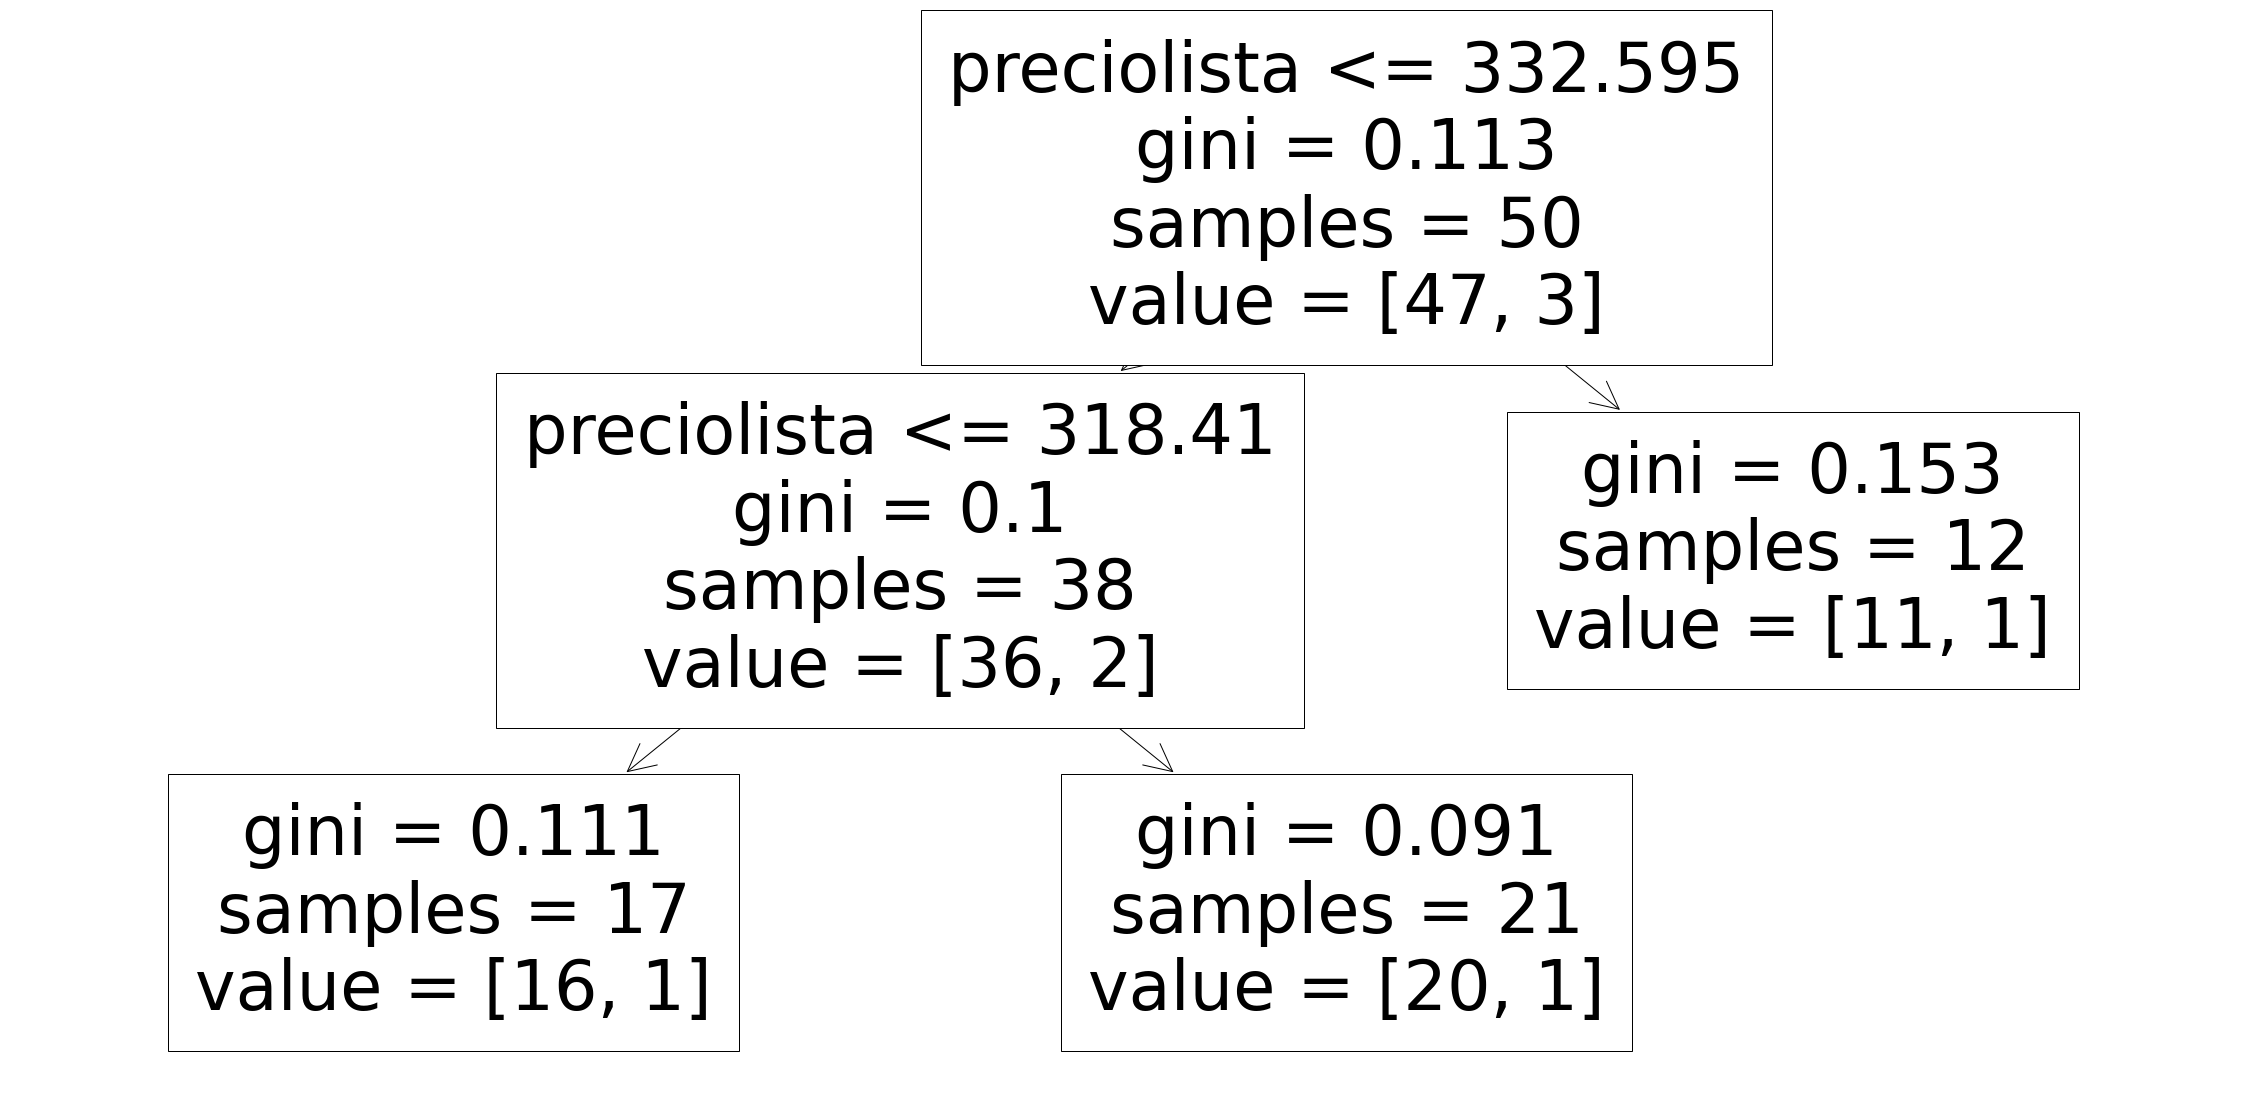

In [72]:
# one attractive feature of a tree is visulization. 
plt.figure(figsize=(40,20))  # customize according to the size of your tree
plot_tree(clf_gini, feature_names = X_train.columns)
plt.show()

In [73]:
# let us build the confusion matrix to evaluate the model in accuracy for both training and test datasets.
# we could also compute more metrics such as precision, recall, f1-score, etc.
y_pred_train = clf_gini.predict(X_train)
cm = pd.DataFrame(confusion_matrix(y_train, y_pred_train).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print(cm)
print("Train Accuracy is ", accuracy_score(y_train,y_pred_train)*100)


y_pred = clf_gini.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print(cm)
print("Test Accuracy is ", accuracy_score(y_test,y_pred)*100)

"""
The test accuracy of our model is significant lower than our training result, this may indicate overfitting. 
we can go back and change the hyperparameters in the training process to reduce the dimension of the parameter space.
"""

     No  Yes
No   47    3
Yes   0    0
Train Accuracy is  94.0


ValueError: Shape of passed values is (1, 1), indices imply (2, 2)